# Web Scraping for Sentiment Analysis Project

***BY Diego Gomez***

This project aims to show how one can easily scrape the web to conduct a sentiment analysis. This project also shows some convenient techniques to make coding more concise and easier to read using the pipe function from the 'magrittr' library in R. Lastly, this project shows how a function can be used to easily get a quick sentiment analysis summary from any website. 

In [2]:
#import libraries 

library(xml2)
library(rvest)
library(magrittr) #allows %>% to pipe data
library(syuzhet)

Warning message:
"package 'syuzhet' was built under R version 3.6.3"


### 1. SJSU Web Scraping

In [3]:
#scrape sjsu website and read in url
url <- "http://www.sjsu.edu"
sjsupage <- read_html(url)

***Let us look at the raw html of the webpage***

In [7]:
#raw text on the webpage; includes tabs, newlines, etc.
html_text(sjsupage)

[1] "\n\t\tvar page_url=\"/about/index.php\";\n\t\tSan Jose State University\n\t\tvar currentNavigationStart = \"/about/\";\n\t\t\n\t\t\t\t\n\t\t\n\n\nNovel Coronavirus (COVID-19)\nVisit the Health Advisories website for the latest information on COVID-19.\n\n\n\n\t\t\n\t\t\n\n\t\t\n\t\t\n\t\t\t\n\t\t\n\t\t\t\n\t\t\n\n\t\t(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],\n\tj=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=\n\t\t'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);\n\t\t\t\t\t\t\t\t\t})(window,document,'script','dataLayer','GTM-PMNG6XV');Skip to main content\n\n\t\t\t#de {display:none;}\n\n\t\t\ttd {\n\t\t\t\tfont-size:100%;\n\t\t\t}\n\n\t\t\t.gcsc-branding {\n\t\t\t\tdisplay:none;\n\t\t\t}\n\n\t\t\t.gsc-control-cse, .gsc-control-cse .gsc-table-result {\n\t\t\t\tfont-size:inherit;\n\t\t\t}\n\n\t\t\tform.gsc-search-box {\n\t\t\t\tfont-size:inherit;\n\t\t\t\tpadding:0;\n\t\t\t\tmargin:0;\n\t\t\t}\n\n\t\t\t.gsc-search-box-tools .gsc-search-box .gsc-input {\n\t\t\t\tpadding:0; }\n\n\t\t\t.gsib_a {\n\t\t\t\tpadding:0 0 0 0;\n\t\t\t\tmargin-left:-10px;\n\t\t\t\tborder:none !important;\n\t\t\t}\n\n\t\t\t.cse .gsc-control-cse, .gsc-control-cse {\n\t\t\t\tpadding:0;\n\t\t\t}\n\n\t\t\ttable.gsc-search-box {\n\t\t\t\tborder-color:#ffffff;\n\t\t\t\tpadding:0;\n\t\t\t\tmargin:0;\n\t\t\t}\n\n\t\t\t.gsc-input-box {\n\t\t\t\tborder:none;\n\t\t\t}\n\n\t\t\t.gsc-input {\n\t\t\t\tborder:none !important;\n\t\t\t\tmargin:0;\n\t\t\t\tpadding:0;\n\t\t\t}\n\n\t\t\tinput.gsc-input {\n\t\t\t\tline-height:1;\n\t\t\t\tpadding:.5rem .75rem !important;\n\t\t\t\tfont-size:inherit;\n\t\t\t\ttext-indent:0 !important;\n\t\t\t\tbackground-image:none !important;\n\t\t\t\tborder:none !important;\n\t\t\t}\n\n\t\t\t.gsc-search-button {\n\t\t\t\tmargin:0;\n\t\t\t\tpadding:0 8px;\n\t\t\t\tbackground-color:#0055a8;\n\t\t\t}\n\n\t\t\t.gsc-search-button-v2 {\n\t\t\t\tfont-size:inherit;\n\t\t\t\tcursor:pointer;\n\t\t\t\tborder:none;\n\t\t\t\tborder-radius:0;\n\t\t\t}\t\t\t\n\n\t\t\t.o-nav-global.show-for-large .gsc-search-button-v2 {\n\t\t\t\tmin-height:48px;\n\t\t\t\tpadding:0px 18px;\n\t\t\t}\n\n\t\t\t.o-nav-global.show-for-large .gsc-search-button-v2 svg {\n\t\t\t\theight:22px;\n\t\t\t\twidth:22px;\n\t\t\t}\t\n\n\t\t\t.o-nav-global.hide-for-large .gsc-search-button-v2 {\n\t\t\t\tmin-height:24px;\n\t\t\t\tpadding:0px 12px;\n\t\t\t\tbackground-color:#ffffff;\n\t\t\t}\t\t\n\n\t\t\t.o-nav-global.hide-for-large .gsc-search-button-v2 svg {\n\t\t\t\tfill:#0055a8;\n\t\t\t\theight:16px;\n\t\t\t\twidth:16px;\n\t\t\t}\n\n\t\t\t.gsc-search-button-v2 svg {\n\t\t\t\theight:22px;\n\t\t\t\twidth:22px;\n\t\t\t}\n\n\t\t\t.gsc-table-result, .gsc-thumbnail-inside, .gsc-url-top {\n\t\t\t\tpadding:0;\n\t\t\t}\n\n\t\t\t.gsc-control-cse .gs-spelling, .gsc-control-cse .gs-result .gs-title, .gsc-control-cse .gs-result .gs-title * {\n\t\t\t\tfont-size:inherit;\n\t\t\t}\n\n\t\t\t#gsc-i-id2 {\n\t\t\t\tpadding:0;\n\t\t\t\tline-height:1.5;\n\t\t\t}\n\n\t\t\t.gsc-result-info {\n\t\t\t\tpadding:0;\n\t\t\t\tfont-size:inherit;\n\t\t\t}\n\n\t\t\t.gsc-selected-option-container {\n\t\t\t\tfont-size:inherit;\n\t\t\t}\n\n\t\t\ttable tbody {\n\t\t\t\tborder:none;\n\t\t\t}\n\n\t\t\ttable tbody td {\n\t\t\t\tpadding:0;\n\t\t\t}\n\n\t\t\tspan.gs-fileFormat {\n\t\t\t\tcolor:#555555;\n\t\t\t\tfont-size:.75rem;\n\t\t\t}\n\n\t\t\tspan.gs-fileFormatType {\n\t\t\t\tfont-size:.75rem;\n\t\t\t}\n\n\t\t\t.gsc-cursor-page {\n\t\t\t\tpadding:0 15px 0 15px;\n\t\t\t}\n\n\t\t\n\t\t\twindow.onload = function(){\n\t\t\t\tdocument.getElementById('gsc-i-id1').placeholder = 'Search SJSU';\n\t\t\t\tdocument.getElementById('gsc-i-id2').placeholder = 'Search SJSU';\n\t\t\t};\t\n\n\t\t\tvar prefersReducedMotion = null;\n\n\t\t\tif (window.matchMedia('(prefers-reduced-motion)').matches) {\n\t\t\t\tprefersReducedMotion = true;\n\t\t\t}\t\n\n\t\t\t(function() 

***Now let us break up the html by pargraphs and get the sentences***

In [5]:
#COVID
#Can do WORDCLOUD

#get html paragraphs; no headers, just normal text
sjsu<-html_text(html_nodes(sjsupage,'p'))
sjsu

[1] "Visit the Health Advisories website for the latest information on COVID-19.\n"                                                                                                                    
 [2] "SJSU Counts: The 2020 Census"                                                                                                                                                                     
 [3] "Complete the California 2020 census and fill out an SJSU survey before April 14 to be entered in a prize drawing."                                                                                
 [4] "Pandemics 100 Years Apart"                                                                                                                                                                        
 [5] "In 1918, the San Jose Normal School addressed the Spanish flu pandemic."                                                                                                                          
 [6] "Campus Climate and Diversity Survey Available through May 8"                                                                                                                                      
 [7] "Through an anonymous survey, SJSU is gathering input from SJSU’s students, faculty and staff to create a climate of belonging."                                                                   
 [8] "Spartan Food Pantry Turns One"                                                                                                                                                                    
 [9] "The Spartan Food Pantry had more than 24,000 visits in its first year."                                                                                                                           
[10] "Alumni Help Develop COVID-19 Test"                                                                                                                                                                
[11] "Alumni are developing a COVID-19 diagnostic test to deliver fast results."                                                                                                                        
[12] "Spartan Judo Legend Turns 100"                                                                                                                                                                    
[13] "SJSU Judo Coach and alumnus Yoshihiro Uchida turns 100 on April 1."                                                                                                                               
[14] "No. 4 Most Transformative College in the Nation —Money magazine"                                                                                                                                  
[15] "Transformation 2030: SJSU’s Strategic Plan"                                                                                                                                                       
[16] "San Jose State is ready for big changes. Our faculty, staff and administrators are dedicated to realizing the university's potential as a nationally prominent urban public university.\n\t\t\t\t\t\t\t\t"
[17] "Electroforming: Where Art and Science Meet "                                                                                                                                                      
[18] "SJSU Spatial Arts lecturer and alumna Yvonne Escalante created an electroforming space at SJSU. \n\t\t\t\t\t\t\t\t"                                                                                       
[19] "\"Eyes\" Highlights Art and Design"                                                                                                                                                               
[20] "\n\t\t\t\t\t\t\t\t\tSJSU Assistant Professor of Graphic Design Yoon Chung Han's exhibit combines art, design and engineering.\n\t\t\t\t\t\t\t\t"                

### 2. SJSU Sentiment Analysis

***Let us conduct a simple sentiment analysis to get the sentiment of each sentence of the webpage***

In [10]:
#get sentences from sjsu webpage 
sentences <- get_sentences(sjsu)

In [11]:
#sentences
sentences

[1] "Visit the Health Advisories website for the latest information on COVID-19."                                                                   
 [2] "SJSU Counts: The 2020 Census"                                                                                                                  
 [3] "Complete the California 2020 census and fill out an SJSU survey before April 14 to be entered in a prize drawing."                             
 [4] "Pandemics 100 Years Apart"                                                                                                                     
 [5] "In 1918, the San Jose Normal School addressed the Spanish flu pandemic."                                                                       
 [6] "Campus Climate and Diversity Survey Available through May 8"                                                                                   
 [7] "Through an anonymous survey, SJSU is gathering input from SJSU's students, faculty and staff to create a climate of belonging."                
 [8] "Spartan Food Pantry Turns One"                                                                                                                 
 [9] "The Spartan Food Pantry had more than 24,000 visits in its first year."                                                                        
[10] "Alumni Help Develop COVID-19 Test"                                                                                                             
[11] "Alumni are developing a COVID-19 diagnostic test to deliver fast results."                                                                     
[12] "Spartan Judo Legend Turns 100"                                                                                                                 
[13] "SJSU Judo Coach and alumnus Yoshihiro Uchida turns 100 on April 1."                                                                            
[14] "No. 4 Most Transformative College in the Nation —Money magazine"                                                                               
[15] "Transformation 2030: SJSU's Strategic Plan"                                                                                                    
[16] "San Jose State is ready for big changes."                                                                                                      
[17] "Our faculty, staff and administrators are dedicated to realizing the university's potential as a nationally prominent urban public university."
[18] "Electroforming: Where Art and Science Meet"                                                                                                    
[19] "SJSU Spatial Arts lecturer and alumna Yvonne Escalante created an electroforming space at SJSU."                                               
[20] "\"Eyes\" Highlights Art and Design"                                                                                                            
[21] "SJSU Assistant Professor of Graphic Design Yoon Chung Han's exhibit combines art, design and engineering."                                     
[22] "San José State University Powering Silicon Valley"                                                                                             
[23] ""

In [15]:
#get the sentiment for each sentence
sjsu_sent_vector <- get_sentiment(sentences, method='syuzhet')
sjsu_sent_vector

[1]  0.80  0.00  0.80  0.00 -1.75  1.05  0.60  0.40  0.40  0.10  0.25  0.00
[13]  0.00  0.60  0.60  1.05  1.60  0.60  0.00  0.60  1.00  0.60  0.00

Above, we get a sentiment vector where positive values indicate positive sentiment and negative values indicate negative sentiment. As we can see, every sentence in the SJSU website is positive. This makes sense given the current situation with  COVID-19; they essentially do not want students, staff and faculty to panic, so they phrase things in a positive manner. 

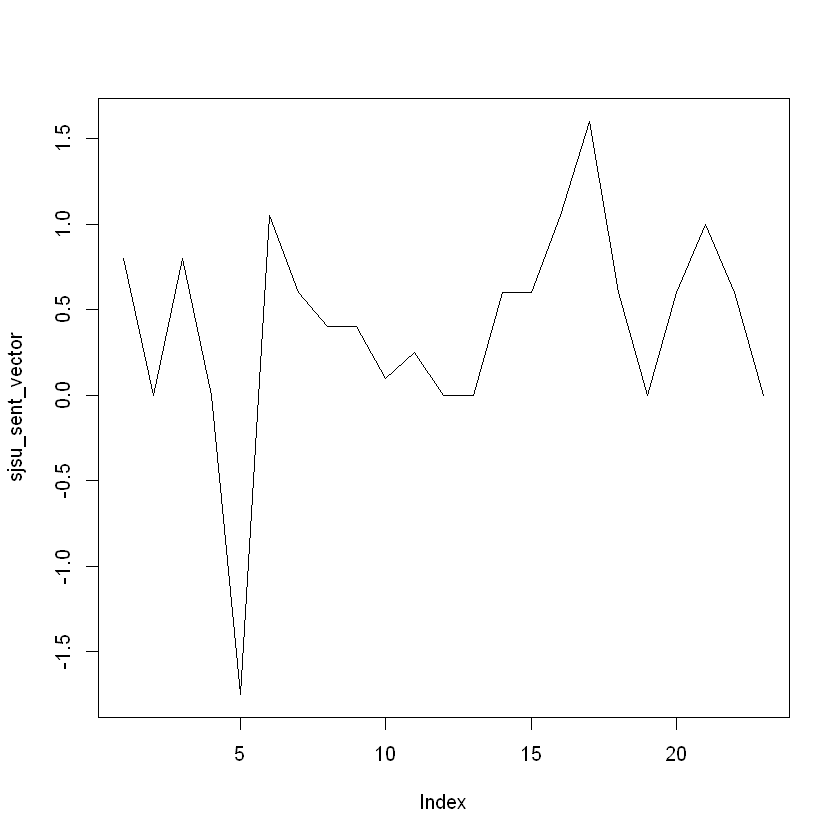

In [16]:
#plot sjsu_sent_vector 
plot(sjsu_sent_vector,type="l")

As with the sentiment vector, the plot above shows us that the majority of the sentences have a positive sentiment. This provides further evidence that they are avoiding negative language during this troubling time, likely to avoid excacerbating the situation. 

***Let us look at the emotions present in the SJSU website as well as the valence of those emotions:***

In [17]:
#get valence and emotions

sjsu_nrc <- get_nrc_sentiment(sentences)
sjsu_nrc

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,2,0,1,0,1,2,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,1,1,2
0,0,0,0,1,0,0,1,0,1
0,0,0,0,1,0,0,1,0,1


In [18]:
#mean (overall it is psoitive)
mean(sjsu_nrc$positive - sjsu_nrc$negative)

[1] 0.6521739

***Using the piping feature in R from  the magrittr library***

We will show how the piping feature in R can make coding more concise and easier to read. The pipe feature works by making the output of one function the input of the next function. We will use this feature to reproduce the code from above. We will do it one step at a time. 

For brevity, the code for several steps has been commented out, but feel free to uncomment the code and run it to get a clearer idea about how the code works. 

In [18]:
#Step 1: have a webpage source

"http://www.sjsu.edu"

[1] "http://www.sjsu.edu"

In [25]:
#Step 2: use the pipe function to read the html

# "http://www.sjsu.edu" %>% read_html

In [24]:
#Step 3: use the pipe function to get the nodes (paragraphs in this case)

# "http://www.sjsu.edu" %>% read_html %>% html_nodes(.,'p')

In [25]:
#Step 3: get the html text 

#"http://www.sjsu.edu" %>% read_html %>% html_nodes(.,'p') %>% 
#html_text

In [23]:
# Step 4: make text into sentences

# "http://www.sjsu.edu" %>% read_html %>% html_nodes(.,'p') %>% 
# html_text %>% get_sentences

In [22]:
#Step 5: get the nrc_sentiment (valence/emotion)

# "http://www.sjsu.edu" %>% read_html %>% html_nodes(.,'p') %>% 
# html_text %>% get_sentences %>% get_nrc_sentiment

In [30]:
#Step 6: get the summary of sentiment analysis

#Note: the '.'  puts a function in a list of arguments
# '.' tells it where to put the argument in a list of arguments 
# (eg, html_text(html_nodes(sjsupage,'p'))), the '.' is the sjsupage

#summary of sentiment analysis(valence/emotion)
"http://www.sjsu.edu" %>% read_html %>% html_nodes(.,'p') %>% 
html_text %>% get_sentences %>% get_nrc_sentiment %>% summary

     anger         anticipation       disgust       fear       
 Min.   :0.0000   Min.   :0.0000   Min.   :0   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0   Median :0.0000  
 Mean   :0.1765   Mean   :0.5882   Mean   :0   Mean   :0.2353  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :2.0000   Max.   :0   Max.   :3.0000  
      joy            sadness           surprise          trust       
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :0.0000  
 Mean   :0.2353   Mean   :0.05882   Mean   :0.1176   Mean   :0.8235  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :4.0000  
    negative         positive    
 Min.   :0.0000   Min.   :0.

### Pipe Funciton for Sentiment Analysis

Using the 6 steps from above, we can make a generic function that can take as input any website and output the sentiment analysis summary. Here, the input is a website to run the sentiment analysis. Feel free to use any website you desire instead of the ones I have here.

Again, using the pipe feauture is useful because it requires less lines of code and less variables. Essentially, it helps in making easy-to-read code. 

In [28]:
#Notice that there are less lines of code less variables

website_func <- function(fn){
    fn %>% read_html %>% html_nodes(.,'p') %>% 
html_text %>% get_sentences %>% get_nrc_sentiment %>% summary
}

In [29]:
website_func("http://www.sjsu.edu")

     anger          anticipation       disgust       fear        
 Min.   :0.00000   Min.   :0.0000   Min.   :0   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0   1st Qu.:0.00000  
 Median :0.00000   Median :0.0000   Median :0   Median :0.00000  
 Mean   :0.04348   Mean   :0.4348   Mean   :0   Mean   :0.08696  
 3rd Qu.:0.00000   3rd Qu.:1.0000   3rd Qu.:0   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :2.0000   Max.   :0   Max.   :2.00000  
      joy            sadness          surprise          trust       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3043   Mean   :0.1739   Mean   :0.1739   Mean   :0.4348  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :2.0000  
    negative         positive     
 Min.   :0.0000   Mi

***Let us try a new website to see if our function works***

Here we use 'http://www.stanford.edu'. Our function will give us a quick summary about the emotional state of website. 

In [35]:
website_func('http://www.stanford.edu')

     anger          anticipation       disgust             fear        
 Min.   :0.00000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.03636   Mean   :0.2545   Mean   :0.01818   Mean   :0.09091  
 3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :2.0000   Max.   :1.00000   Max.   :1.00000  
      joy            sadness           surprise          trust       
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :0.0000  
 Mean   :0.1818   Mean   :0.03636   Mean   :0.1091   Mean   :0.2364  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :2.0000   Max.   :1.00000   Max.   :2.0000   Max.   :2.0000  
    ne

Will it work on the Santa Clara website? Yes

In [36]:
#santa clara
website_func('http://www.sccgov.org')

     anger    anticipation    disgust       fear        joy       sadness 
 Min.   :0   Min.   :0     Min.   :0   Min.   :0   Min.   :0   Min.   :0  
 1st Qu.:0   1st Qu.:0     1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 Median :0   Median :0     Median :0   Median :0   Median :0   Median :0  
 Mean   :0   Mean   :0     Mean   :0   Mean   :0   Mean   :0   Mean   :0  
 3rd Qu.:0   3rd Qu.:0     3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0  
 Max.   :0   Max.   :0     Max.   :0   Max.   :0   Max.   :0   Max.   :0  
    surprise     trust      negative    positive     
 Min.   :0   Min.   :0   Min.   :0   Min.   :0.0000  
 1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0.0000  
 Median :0   Median :0   Median :0   Median :0.0000  
 Mean   :0   Mean   :0   Mean   :0   Mean   :0.1818  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0.0000  
 Max.   :0   Max.   :0   Max.   :0   Max.   :1.0000  

How about a specific page within the website the website? Yes! This page talks about COVID-19, and notice that it is very positive, presumably to keep the public calm.

In [37]:
#high positive sentiment (incredibly positive, trying to avoid panic)
website_func('https://www.sccgov.org/sites/phd/DiseaseInformation/novel-coronavirus/Pages/home.aspx')

     anger    anticipation    disgust         fear          joy       sadness 
 Min.   :0   Min.   :0     Min.   :0.0   Min.   :0.0   Min.   :0   Min.   :0  
 1st Qu.:0   1st Qu.:1     1st Qu.:0.0   1st Qu.:0.0   1st Qu.:0   1st Qu.:0  
 Median :0   Median :1     Median :0.0   Median :0.0   Median :0   Median :0  
 Mean   :0   Mean   :1     Mean   :0.2   Mean   :0.2   Mean   :0   Mean   :0  
 3rd Qu.:0   3rd Qu.:1     3rd Qu.:0.0   3rd Qu.:0.0   3rd Qu.:0   3rd Qu.:0  
 Max.   :0   Max.   :2     Max.   :1.0   Max.   :1.0   Max.   :0   Max.   :0  
    surprise     trust      negative      positive  
 Min.   :0   Min.   :0   Min.   :0.0   Min.   :1.0  
 1st Qu.:0   1st Qu.:0   1st Qu.:0.0   1st Qu.:1.0  
 Median :0   Median :1   Median :0.0   Median :4.0  
 Mean   :0   Mean   :1   Mean   :0.2   Mean   :2.8  
 3rd Qu.:0   3rd Qu.:2   3rd Qu.:0.0   3rd Qu.:4.0  
 Max.   :0   Max.   :2   Max.   :1.0   Max.   :4.0  

Will it work on a non-college related website? Yes, but notice all  the zeros. In order to get meaningful insight into a webpage, provide a source where there is text.

In [38]:
website_func('https://www.reddit.com')

     anger    anticipation    disgust       fear        joy       sadness 
 Min.   :0   Min.   :0     Min.   :0   Min.   :0   Min.   :0   Min.   :0  
 1st Qu.:0   1st Qu.:0     1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 Median :0   Median :0     Median :0   Median :0   Median :0   Median :0  
 Mean   :0   Mean   :0     Mean   :0   Mean   :0   Mean   :0   Mean   :0  
 3rd Qu.:0   3rd Qu.:0     3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0  
 Max.   :0   Max.   :0     Max.   :0   Max.   :0   Max.   :0   Max.   :0  
    surprise     trust      negative    positive
 Min.   :0   Min.   :0   Min.   :0   Min.   :0  
 1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.:0  
 Median :0   Median :0   Median :0   Median :0  
 Mean   :0   Mean   :0   Mean   :0   Mean   :0  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0  
 Max.   :0   Max.   :0   Max.   :0   Max.   :0  

# Conclusion

This project displays how to scrape the web and conduct a sentiment Analysis. It also shows how the 'magrittr' library in R can be used to pipe functions using %>%. Finally, it shows how a sequence of functions can be piped together into one overarching function that can produce a sentiment analysis summary with just a few lines of code.